# EDA

- EDA stands for Exploratory Data Analysis
- It's a method of analyzing and summarizing data sets before making any assumptions or sometimes performing data cleansing.
- It helps identify patterns, spot anomalies, inspect data quality, test hypotheses, and check assumptions
- It's a very important step in the DS/ML pipeline because it provides a better understanding of the data and its charecteristics
- EDA Techniques:
    - **Descriptive Statistics** 
        - Measures of Central Tendency: e.g. mean, median, mode
        - Measures of Dispersion: e.g. Standards Deviation
        - Measures of Shape: e.g. skewness
        - Correlation
    - **Non-Graphical Analysis** Data aggregation
        - Checking for missing values
        - Checking for outliers
        - Checking of the data
        - Aggregation:
            - `pivot()`
            - `groupby()`
            - `agg()`
            - `crosstab()`
    - **Data Visulalization** Example: (using `pandas`,`matplotlib`, `seaborn`, `plotly`)
        - Histograms
        - Line graphs
        - Box and Whisker
        - Heatmaps
        - Scatterplots
        - Pie chart


## Descriptive Statistics

In [1]:
import pandas as pd
df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/HousePrices.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [2]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


**Observation**
- 75% of the houses are below 650,000 (or 6.549625e+05	)
- Avg sqft of living is 2139 and min is 370
- Avg bedrooms = 3
- min price is 0 could be missing information, we may need to remove it
- Waterfront seems to be a categorical column, so we cannot do much statistical analysis on it
- stddev could be high, need to inspect the distribution

In [3]:
df['price'].skew()

24.790932561757053

## Other Non-graphical EDA

In [4]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [5]:
df.groupby(['city']).mean([['price', 'bedrooms', 'sqft_living', 'floors']])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
city,,,,,,,,,,,,,
Algona,2.072880e+05,3.200000,1.900000,1608.600000,11494.200000,1.400000,0.000000,0.000000,3.200000,1608.600000,0.000000,1983.200000,800.400000
Auburn,2.993404e+05,3.420455,2.092330,2019.579545,24999.221591,1.448864,0.000000,0.125000,3.409091,1862.250000,157.329545,1980.795455,725.761364
Beaux Arts Village,7.450000e+05,3.000000,1.750000,1490.000000,9800.000000,1.000000,0.000000,0.000000,4.000000,1140.000000,350.000000,1947.000000,1988.000000
Bellevue,8.471807e+05,3.804196,2.453671,2694.527972,13741.178322,1.398601,0.006993,0.391608,3.590909,2182.604895,511.923077,1973.814685,823.517483
Black Diamond,3.396056e+05,3.222222,1.750000,1863.333333,25006.666667,1.388889,0.000000,0.000000,3.222222,1807.777778,55.555556,1978.666667,1107.333333
Bothell,4.814419e+05,3.606061,2.431818,2319.393939,9060.181818,1.500000,0.000000,0.000000,3.151515,1957.878788,361.515152,1982.696970,727.151515
Burien,3.489472e+05,3.337838,1.746622,1815.337838,12158.554054,1.209459,0.040541,0.540541,3.554054,1468.445946,346.891892,1957.351351,1183.945946
Carnation,5.087520e+05,3.090909,2.170455,2392.454545,64873.772727,1.522727,0.000000,0.318182,3.090909,2205.181818,187.272727,1982.818182,727.318182
Clyde Hill,1.321945e+06,4.181818,2.613636,3620.909091,19633.909091,1.181818,0.000000,0.818182,3.545455,2522.727273,1098.181818,1964.454545,1092.000000


In [6]:
df.pivot_table(df[['price', 'bedrooms', 'sqft_living', 'floors']], index=['country','city']) 
# if you don't specify aggfunc, mean is used

bedrooms    floors         price  sqft_living
country city                                                              
USA     Algona               3.200000  1.400000  2.072880e+05  1608.600000
        Auburn               3.420455  1.448864  2.993404e+05  2019.579545
        Beaux Arts Village   3.000000  1.000000  7.450000e+05  1490.000000
        Bellevue             3.804196  1.398601  8.471807e+05  2694.527972
        Black Diamond        3.222222  1.388889  3.396056e+05  1863.333333
        Bothell              3.606061  1.500000  4.814419e+05  2319.393939
        Burien               3.337838  1.209459  3.489472e+05  1815.337838
        Carnation            3.090909  1.522727  5.087520e+05  2392.454545
        Clyde Hill           4.181818  1.181818  1.321945e+06  3620.909091
        Covington            3.325581  1.348837  2.962304e+05  1792.558140
        Des Moines           3.241379  1.250000  3.049925e+05  1812.620690
        Duvall               3.380952  1.642857  4.039941e+05  2161.547619
        Enumclaw             3.178571  1.303571  3.076146e+05  1922.500000
        Fall City            3.818182  1.363636  6.926818e+05  2865.909091
        Federal Way          3.500000  1.344595  2.898877e+05  2054.114865
        Inglewood-Finn Hill  4.000000  1.000000  4.250000e+05  1520.000000
        Issaquah             3.561497  1.799465  5.961637e+05  2458.844920
        Kenmore              3.560606  1.484848  4.474940e+05  2110.530303
        Kent                 3.459459  1.454054  4.394924e+05  1981.270270
        Kirkland             3.540107  1.459893  6.515836e+05  2259.481283
        Lake Forest Park     3.750000  1.250000  4.484750e+05  2283.055556
        Maple Valley         3.489583  1.796875  3.364749e+05  2086.041667
        Medina               4.090909  1.636364  2.046559e+06  4103.636364
        Mercer Island        4.116279  1.598837  1.123818e+06  3275.313953
        Milton               3.000000  1.000000  2.850000e+05  1255.000000
        Newcastle            3.757576  1.727273  6.660467e+05  2689.090909
        Normandy Park        3.444444  1.055556  5.067931e+05  2093.277778
        North Bend           3.300000  1.570000  3.995657e+05  1995.400000
        Pacific              3.333333  1.333333  2.252333e+05  1520.833333
        Preston              2.500000  1.750000  5.624500e+05  2280.000000
        Ravensdale           3.428571  1.714286  5.140714e+05  2612.857143
        Redmond              3.421277  1.563830  6.676495e+05  2491.761702
        Renton               3.481229  1.482935  3.770410e+05  2114.761092
        Sammamish            3.725714  1.768571  6.869176e+05  2830.120000
        SeaTac               3.275862  1.189655  2.452906e+05  1678.517241
        Seattle              3.169739  1.530833  5.798375e+05  1828.623649
        Shoreline            3.308943  1.219512  4.203924e+05  1774.837398
        Skykomish            2.666667  1.666667  2.330000e+05  1356.666667
        Snoqualmie           3.577465  1.873239  5.363053e+05  2716.056338
        Snoqualmie Pass      3.000000  2.000000  5.250000e+05  2100.000000
        Tukwila              3.068966  1.379310  3.082901e+05  1706.206897
        Vashon               2.758621  1.517241  4.725569e+05  1889.689655
        Woodinville          3.556522  1.547826  6.095650e+05  2663.008696
        Yarrow Point         3.750000  2.000000  1.194838e+06  2472.500000

In [7]:
# derive the state from the statezip column
df['state'] = df['statezip'].str[:2]
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,state
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,WA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,WA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,WA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,WA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,WA


In [8]:
df.pivot_table(df[['price', 'bedrooms', 'sqft_living', 'floors']], index=['state','city']) 

bedrooms    floors         price  sqft_living
state city                                                              
WA    Algona               3.200000  1.400000  2.072880e+05  1608.600000
      Auburn               3.420455  1.448864  2.993404e+05  2019.579545
      Beaux Arts Village   3.000000  1.000000  7.450000e+05  1490.000000
      Bellevue             3.804196  1.398601  8.471807e+05  2694.527972
      Black Diamond        3.222222  1.388889  3.396056e+05  1863.333333
      Bothell              3.606061  1.500000  4.814419e+05  2319.393939
      Burien               3.337838  1.209459  3.489472e+05  1815.337838
      Carnation            3.090909  1.522727  5.087520e+05  2392.454545
      Clyde Hill           4.181818  1.181818  1.321945e+06  3620.909091
      Covington            3.325581  1.348837  2.962304e+05  1792.558140
      Des Moines           3.241379  1.250000  3.049925e+05  1812.620690
      Duvall               3.380952  1.642857  4.039941e+05  2161.547619
      Enumclaw             3.178571  1.303571  3.076146e+05  1922.500000
      Fall City            3.818182  1.363636  6.926818e+05  2865.909091
      Federal Way          3.500000  1.344595  2.898877e+05  2054.114865
      Inglewood-Finn Hill  4.000000  1.000000  4.250000e+05  1520.000000
      Issaquah             3.561497  1.799465  5.961637e+05  2458.844920
      Kenmore              3.560606  1.484848  4.474940e+05  2110.530303
      Kent                 3.459459  1.454054  4.394924e+05  1981.270270
      Kirkland             3.540107  1.459893  6.515836e+05  2259.481283
      Lake Forest Park     3.750000  1.250000  4.484750e+05  2283.055556
      Maple Valley         3.489583  1.796875  3.364749e+05  2086.041667
      Medina               4.090909  1.636364  2.046559e+06  4103.636364
      Mercer Island        4.116279  1.598837  1.123818e+06  3275.313953
      Milton               3.000000  1.000000  2.850000e+05  1255.000000
      Newcastle            3.757576  1.727273  6.660467e+05  2689.090909
      Normandy Park        3.444444  1.055556  5.067931e+05  2093.277778
      North Bend           3.300000  1.570000  3.995657e+05  1995.400000
      Pacific              3.333333  1.333333  2.252333e+05  1520.833333
      Preston              2.500000  1.750000  5.624500e+05  2280.000000
      Ravensdale           3.428571  1.714286  5.140714e+05  2612.857143
      Redmond              3.421277  1.563830  6.676495e+05  2491.761702
      Renton               3.481229  1.482935  3.770410e+05  2114.761092
      Sammamish            3.725714  1.768571  6.869176e+05  2830.120000
      SeaTac               3.275862  1.189655  2.452906e+05  1678.517241
      Seattle              3.169739  1.530833  5.798375e+05  1828.623649
      Shoreline            3.308943  1.219512  4.203924e+05  1774.837398
      Skykomish            2.666667  1.666667  2.330000e+05  1356.666667
      Snoqualmie           3.577465  1.873239  5.363053e+05  2716.056338
      Snoqualmie Pass      3.000000  2.000000  5.250000e+05  2100.000000
      Tukwila              3.068966  1.379310  3.082901e+05  1706.206897
      Vashon               2.758621  1.517241  4.725569e+05  1889.689655
      Woodinville          3.556522  1.547826  6.095650e+05  2663.008696
      Yarrow Point         3.750000  2.000000  1.194838e+06  2472.500000

In [9]:
## aggregate with multiple categorical columns with multiple statistical measures
df.groupby(['city','yr_built'])['price'].agg(['mean', 'median', 'max'])

mean     median        max
city         yr_built                                 
Algona       1956       100000.0   100000.0   100000.0
             1960       230000.0   230000.0   230000.0
             1992       196440.0   196440.0   196440.0
             2002       262000.0   262000.0   262000.0
             2006       248000.0   248000.0   248000.0
...                          ...        ...        ...
Woodinville  2013       646212.5   646212.5   646212.5
Yarrow Point 1949       899000.0   899000.0   899000.0
             1953        84350.0    84350.0    84350.0
             1969      1895000.0  1895000.0  1895000.0
             1992      1901000.0  1901000.0  1901000.0

[1300 rows x 3 columns]

In [10]:
df_over_avg = df[df['price']>df['price'].mean()]
df_over_avg.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,state
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,WA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA,WA
11,2014-05-02 00:00:00,1400000.0,4.0,2.50,2920,4000,1.5,0,0,5,1910,1010,1909,1988,3838-4098 44th Ave NE,Seattle,WA 98105,USA,WA
12,2014-05-02 00:00:00,588500.0,3.0,1.75,2330,14892,1.0,0,0,3,1970,360,1980,0,1833 220th Pl NE,Sammamish,WA 98074,USA,WA
14,2014-05-02 00:00:00,1200000.0,5.0,2.75,2910,9480,1.5,0,0,3,2910,0,1939,1969,3534 46th Ave NE,Seattle,WA 98105,USA,WA


In [11]:
# have different function for each numerical column
df_over_avg.groupby(['city','yr_built'])[['price','bedrooms','floors']].agg({'price':'mean', 
                                                                            'bedrooms':'median', 
                                                                            'floors':'max'})

price  bedrooms  floors
city         yr_built                             
Auburn       1978       625000.0       3.0     1.0
             1986       560000.0       3.0     1.0
             1993       799950.0       4.0     2.0
             2000       900000.0       3.0     1.5
             2002       696225.0       4.0     2.0
...                          ...       ...     ...
Woodinville  2004       559900.0       3.0     1.0
             2013       646212.5       4.0     2.0
Yarrow Point 1949       899000.0       3.0     2.0
             1969      1895000.0       5.0     2.0
             1992      1901000.0       3.0     2.0

[597 rows x 3 columns]

## Data Visualization

![choosing the right chart](https://www.labnol.org/images/2008/data-chart-type.png)

### Plotting Basics

`pip install matplotlib`

In [12]:
import matplotlib.pyplot as plt
import numpy as np

List of color names in `matplotlib` https://matplotlib.org/stable/gallery/color/named_colors.html

#### Line Plots

In [13]:
#generate data
x = np.linspace(0, 10, 100) # gives an array ranged between 0 and 10 with 100 divisions
y = np.sin(x)

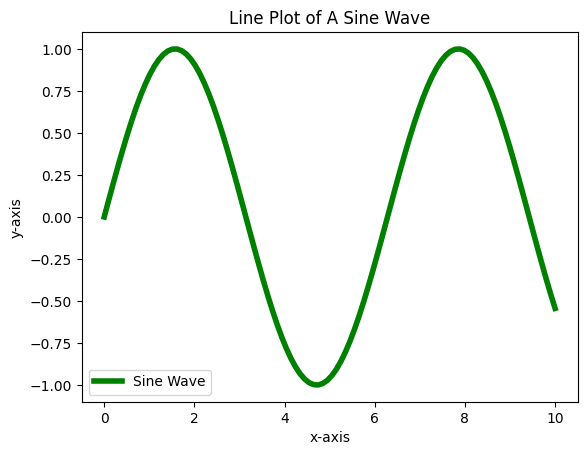

In [14]:
#create a lineplot using plot function
plt.plot(x, y, label='Sine Wave', color='green', linewidth=4)

#formatting the plot area
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Line Plot of A Sine Wave')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


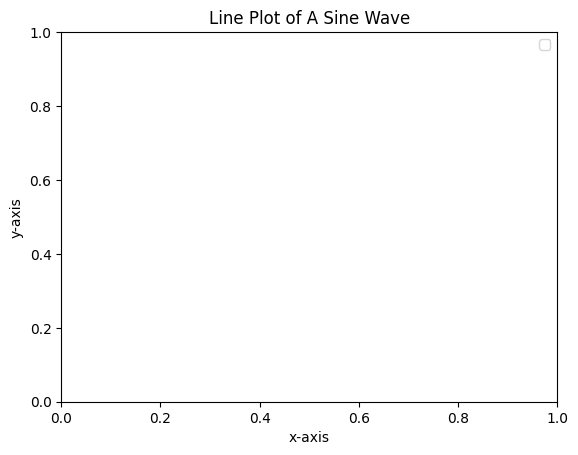

In [15]:
#formatting the plot area
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Line Plot of A Sine Wave')
plt.legend()

`matplotlib` theme styles

In [16]:
plt.style.use('ggplot') #run once

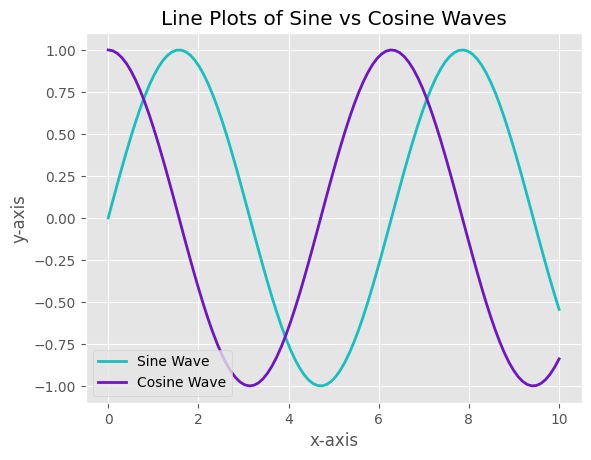

In [17]:
#generate data
x = np.linspace(0, 10, 100) # gives an array ranged between 0 and 10 with 100 divisions
y1 = np.sin(x)
y2 = np.cos(x)

#create a lineplot using plot function
plt.plot(x, y1, label='Sine Wave', color='#17BFBF', linewidth=2)
plt.plot(x, y2, label='Cosine Wave', color='#6E17BF', linewidth=2)

#formatting the plot area
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Line Plots of Sine vs Cosine Waves')
plt.legend()
plt.grid(True)

#### Bar Chart

<BarContainer object of 3 artists>

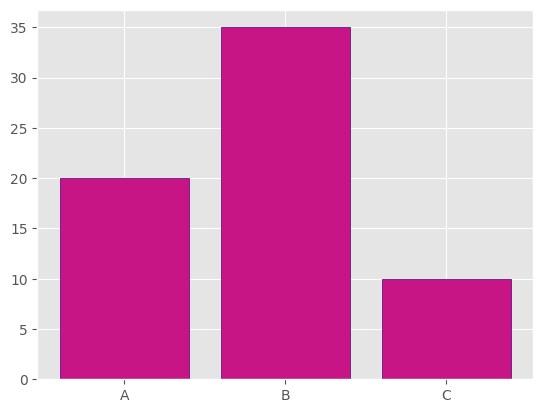

In [18]:
categories = ['A', 'B', 'C']
values = [20, 35, 10]

plt.bar(categories, values, color='mediumvioletred', edgecolor='indigo')

# EDA Exercise - Exploring Different Types of Charts

There are so many variables that impact the price of a house. With dynamic parameters in the residential real state business, it is always important to reach a reasonable price for better business opportunities. As a part of the analytics team in a real state company, you have to come up with the variables that are impacting the price of the house through analyzing and visualizing the data.

> Check the data dictionary to have a better understanding of the column definitions and category meanings

In [19]:
df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/housing_data.csv'
                 , index_col=0)#use the index from the csv file instead of the defaul one
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,SC20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,SC60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,SC70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,SC60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [20]:
len(df.columns)

80

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [22]:
df.sample(7)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1389,SC50,RM,60.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Mar,2007,WD,Normal,131000
1030,SC190,RH,0.0,7082,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Jul,2006,WD,Normal,160000
1163,SC90,RL,60.0,12900,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Jan,2008,WD,Alloca,108959
1085,SC85,RL,73.0,9069,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Apr,2010,WD,Normal,147000
154,SC30,RM,84.0,11340,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,No,No,No,0,Mar,2006,WD,Family,125000
804,SC20,RL,75.0,9000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,GdWo,No,0,Jun,2006,WD,Family,118000
152,SC60,RL,0.0,14803,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,No,GdWo,No,0,Jun,2006,WD,Normal,190000


In [23]:
df.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


In [24]:
# get the top 10 most expensive neighborhoods based on highest average
df.groupby('Neighborhood')['SalePrice'].mean().nlargest(10)

Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Somerst    225379.837209
ClearCr    212565.428571
Crawfor    210624.725490
CollgCr    197965.773333
Blmngtn    194870.882353
Name: SalePrice, dtype: float64

<Axes: ylabel='Neighborhood'>

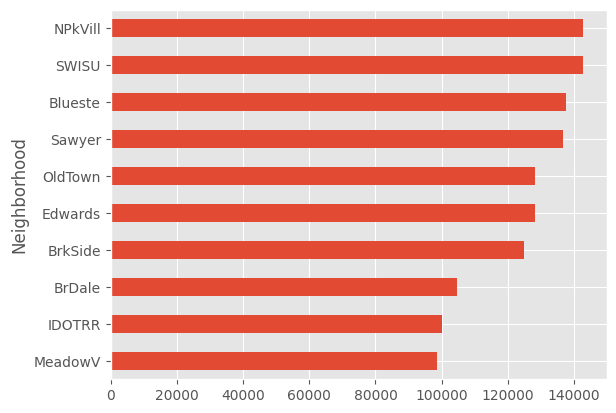

In [25]:
#viz using the builtin plotting libr in pandas
df.groupby('Neighborhood')['SalePrice'].mean().nsmallest(10).plot(kind='barh')

In [26]:
cat_features_list = df.select_dtypes(exclude=['int','float']).columns #df.select_dtypes(include=['object']).columns
cat_features_list

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [27]:
num_features_list = df.select_dtypes(include=['int','float']).columns
num_features_list

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice'],
      dtype='object')

> NOTE: be aware of categorical columns disguised in numerical values. You need to remove them manually from the num feature list

**About Seaborn**
- `pip install seaborn`
- Powerful data visualization library built on top of `matplotlib`
- It's rich with statistical plots
- It has nice themes and styling
- Works very well with `pandas`

In [28]:
pip show seaborn

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages
Requires: matplotlib, numpy, pandas
Required-by: 
Note: you may need to restart the kernel to use updated packages.


`pip install seaborn==0.12.2`

In [29]:
import seaborn as sns

## Univariate Analysis

- "uni" means one
- analyzing one variable/feature/column
- simplest form of EDA and it's recommended to start with
- It doesn't deal with causation or relationship
- It can be done with both **numerical** and **categorical** columns
- Types:
    - Histograms
    - KDE (Bell curves)
    - Box and Whisker plots
    - Swarm
    - Violin

### Categorical Histograms

<Axes: xlabel='BsmtQual', ylabel='Count'>

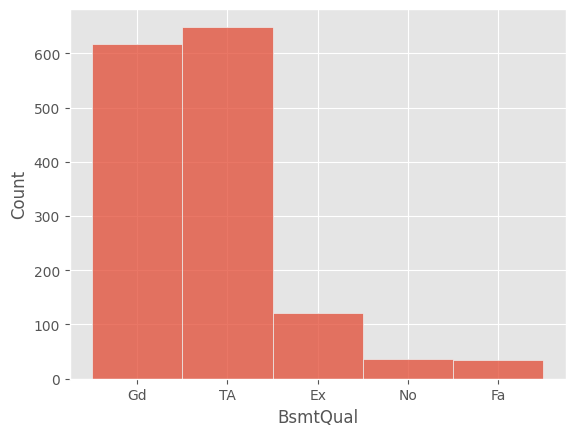

In [30]:
sns.histplot(data=df, x='BsmtQual')

**Observation**
- Gd (Good 90-99) and TA (Typical 80-89) are the most common basement quality evaluation
- The rest, such as No, Fa (no basement and fair ) and the least common

### Numerical Histograms

<Axes: >

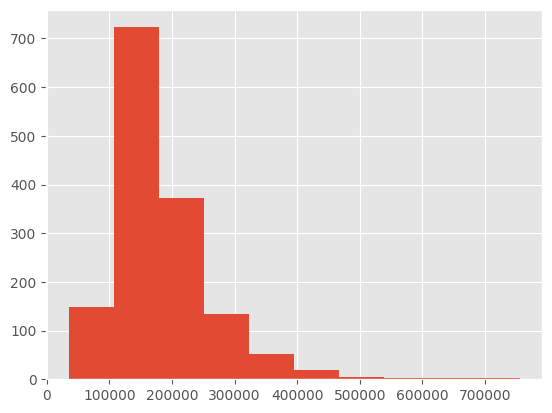

In [31]:
#using pandas builtin viz
df['SalePrice'].hist()

<Axes: xlabel='SalePrice', ylabel='Count'>

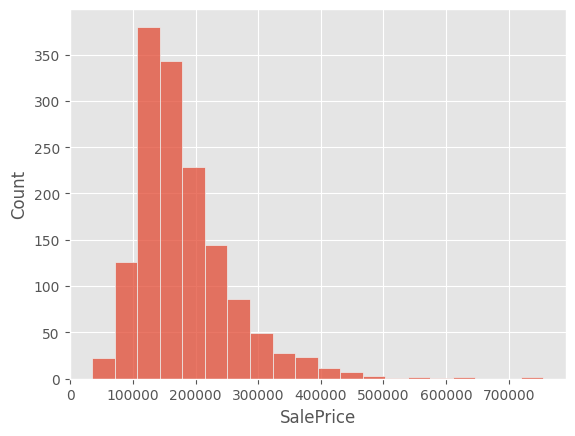

In [32]:
sns.histplot(data=df, x='SalePrice', bins=20)

- There's no rule of thumb of how many bins to choose for your data
- Every data element is different
- Basically, the goal is to avoid have bins that are too small or too large
 
![bins comp](https://statistics.laerd.com/statistical-guides/img/uh/laerd-statistics-example-histograms-showing-different-bin-sizes.png)

Example of a balanced num of bins:
 
![good hist](https://statistics.laerd.com/statistical-guides/img/uh/laerd-statistics-example-histogram-frequencies-for-age.png)

<Axes: xlabel='SalePrice', ylabel='Count'>

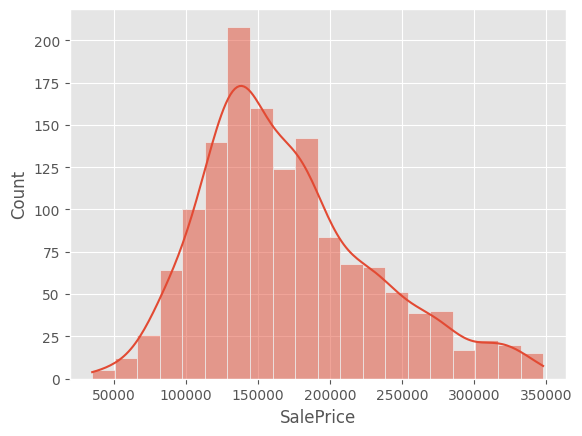

In [33]:
# visually remove extreme values to focus on most frequ values
# add a KDE (Kernel Density Estimate)
sns.histplot(data=df[df['SalePrice']<350000], x='SalePrice', bins=20, kde=True)

### Box and Whisker Plots
**Anatomy of a Box Plot**
</br>
![boxplot](https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png)

<Axes: xlabel='LotArea'>

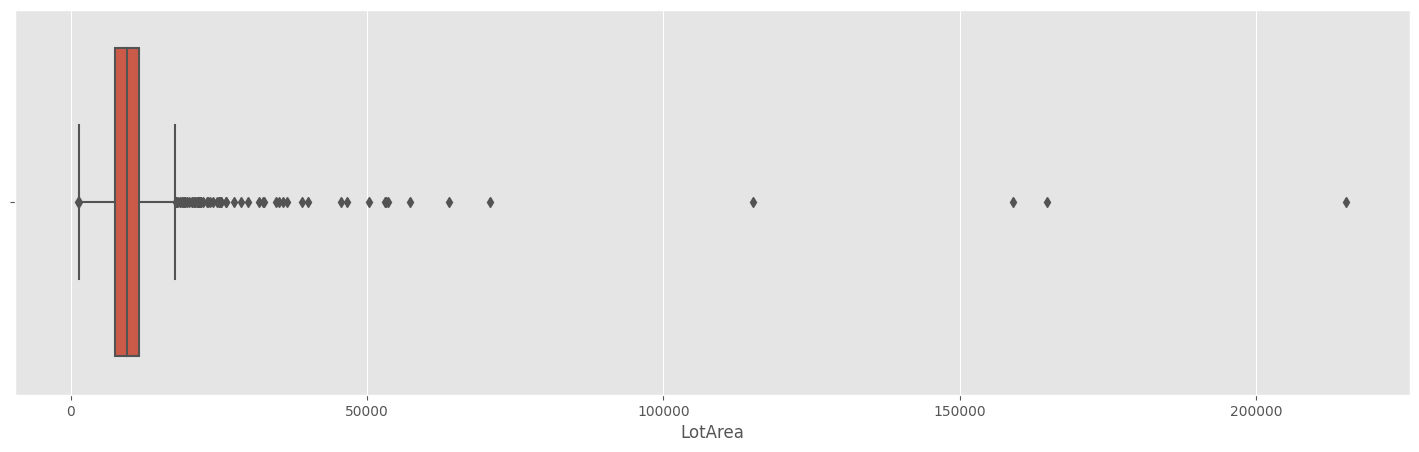

In [34]:
plt.figure(figsize=(18,5))
sns.boxplot(x=df['LotArea'])

- The boxplot above shows that we have a lot of outliers because soe houses may have acres of land
- The LotArea is heavily skewed

<Axes: xlabel='SalePrice'>

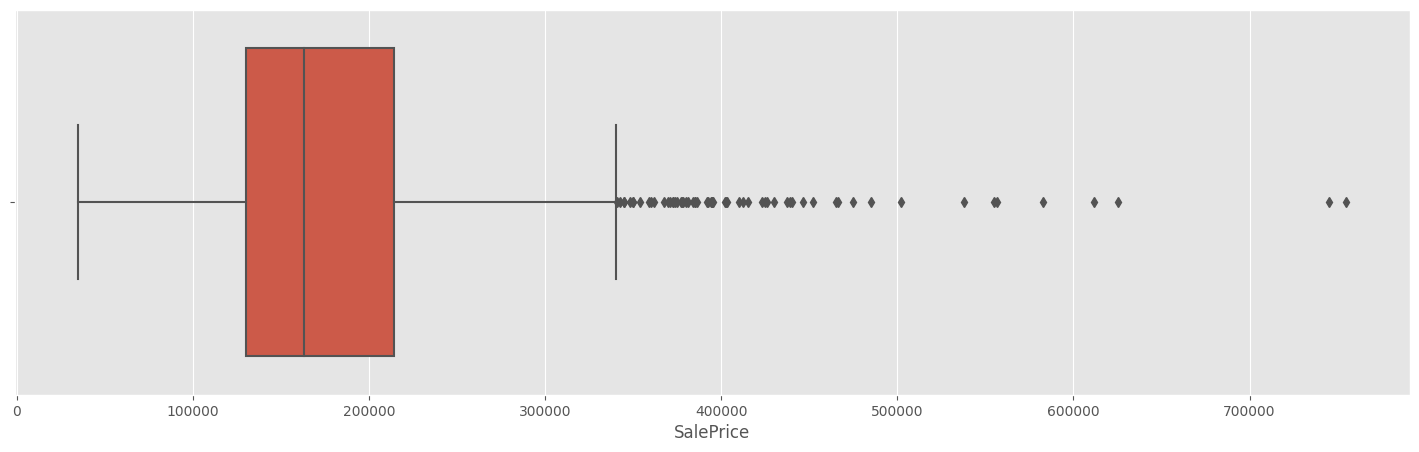

In [35]:
plt.figure(figsize=(18,5))
sns.boxplot(x=df['SalePrice'])

<Axes: ylabel='SalePrice'>

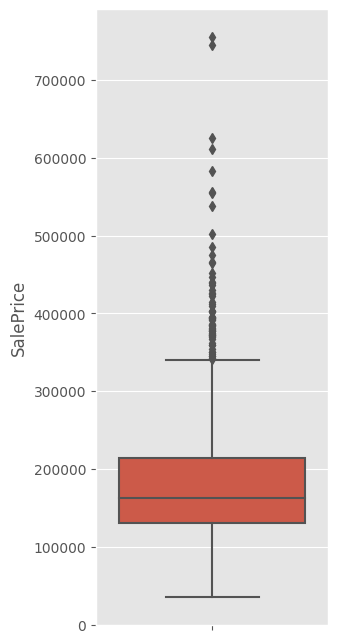

In [36]:
plt.figure(figsize=(3,8)) #dpi=300increase the resolution
sns.boxplot(y=df['SalePrice'])

#### Using `subplots()`
- Subplots are a way of creating multiple plots in a single figure(grid)
- Useful for comparing multiple visuals side-by-side
- to use subplots in seaborn, you need to use matplotlib 
- each element/plot in the grid can be references using indices

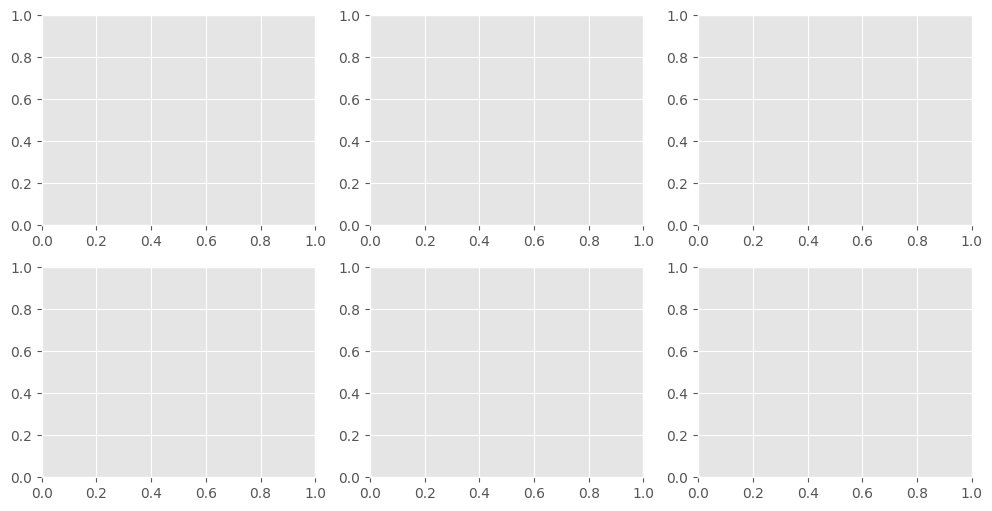

In [37]:
# build a grid of plots 2 x 3

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,6))

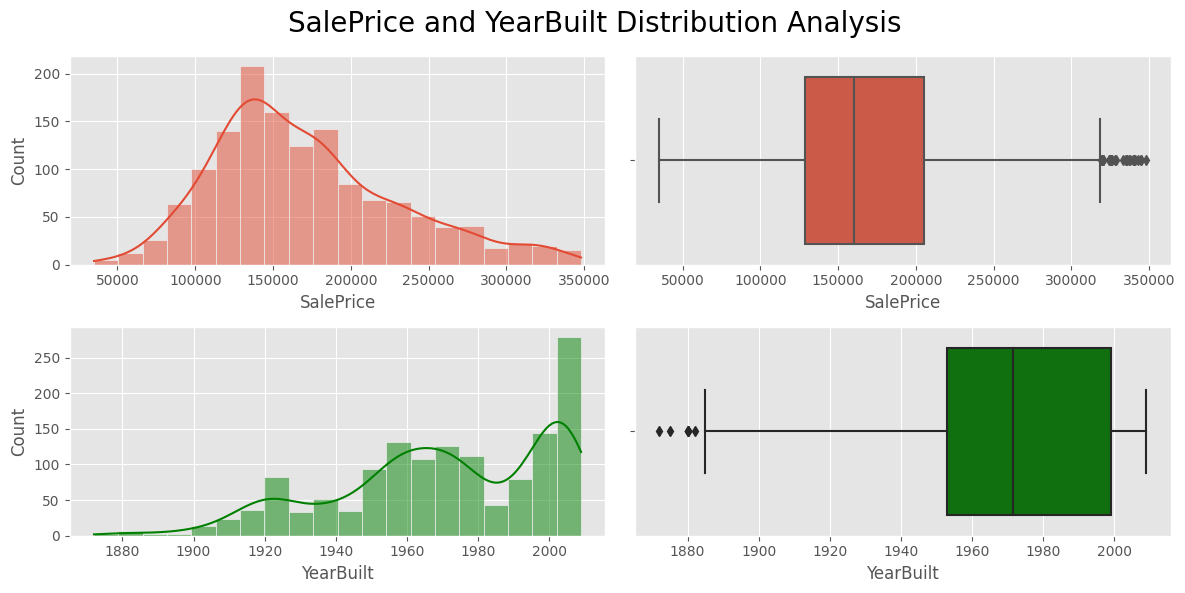

In [38]:

# build a grid of plots 2 x 2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

# inserting plots inside the grid
# let's build an analysis for SalePrice and Yearbuilt using 2 different charts
sns.histplot(data=df[df['SalePrice']<350000], x='SalePrice', bins=20, kde=True, ax=axes[0,0])
sns.histplot(data=df[df['SalePrice']<350000], x='YearBuilt', bins=20, kde=True, ax=axes[1,0], color='green')
#boxplots
sns.boxplot(data=df[df['SalePrice']<350000], x='SalePrice', ax=axes[0,1])
sns.boxplot(data=df[df['SalePrice']<350000], x='YearBuilt', ax=axes[1,1], color='green')

fig.suptitle('SalePrice and YearBuilt Distribution Analysis', fontsize=20)
fig.tight_layout() #avoid overlapping lables and gives margins between charts

- SalePrice is positively skewed and YearBuilt is negatively skewed
- YearBuilt is very skewed compared SalePrice
- SalePrice appears to be between $140 and $145k
- Boxplots confirm th skewness and show that we have outliers on the left side for YearBuilt and on the right side for SalePrice


In [39]:
num_features_list

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice'],
      dtype='object')

#### Automate Building Charts with Subplots

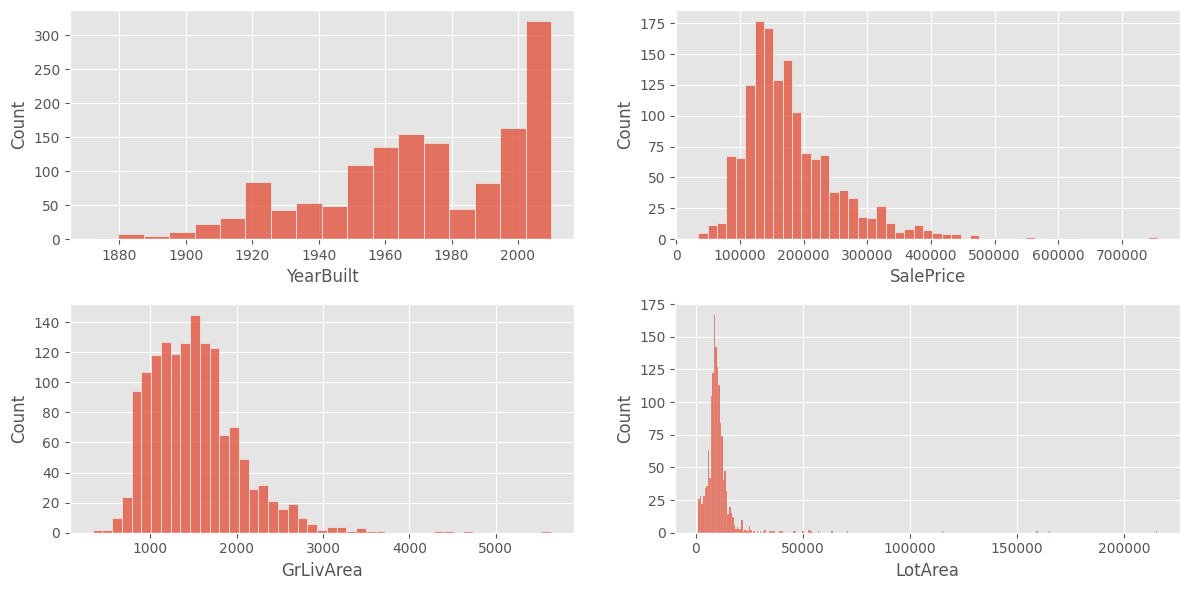

In [40]:
my_col_list = ['YearBuilt','SalePrice','GrLivArea', 'LotArea']

#build a separate df for the visualization
subplot_df = df[my_col_list]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

#reset the index for chart location in the grid
index = 0 
#flatten the axes location into one dimensions to iterate through the list
axes = axes.flatten()

#iterate through key:value in the dataframe (cols and their values)
for k, v in subplot_df.items():
    sns.histplot(data=subplot_df, x=k, ax=axes[index]) #build a hist for each column
    index += 1 #incrementing by 1 for the cell location in the grid

fig.tight_layout(w_pad=3)

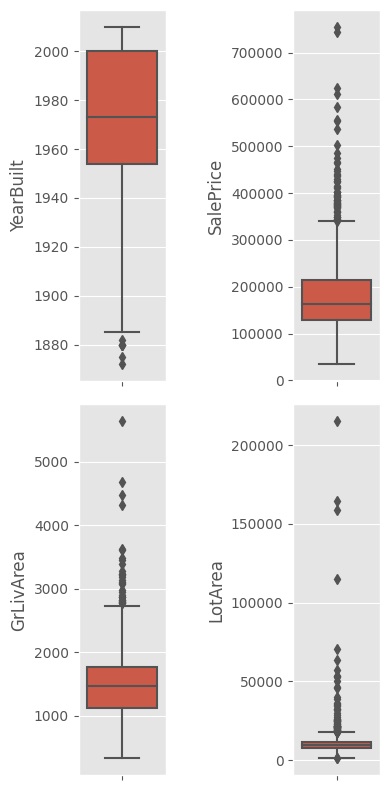

In [41]:
my_col_list = ['YearBuilt','SalePrice','GrLivArea', 'LotArea']

#build a separate df for the visualization
subplot_df = df[my_col_list]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(4,8))

#reset the index for chart location in the grid
index = 0 
#flatten the axes location into one dimensions to iterate through the list
axes = axes.flatten()

#iterate through key:value in the dataframe (cols and their values)
for k, v in subplot_df.items():
    sns.boxplot(data=subplot_df, y=k, ax=axes[index]) #build a hist for each column
    index += 1 #incrementing by 1 for the cell location in the grid

fig.tight_layout(w_pad=3)

#### Countplot

In [42]:
df['SaleCondition'].value_counts()

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Abnorml'),
  Text(2, 0, 'Partial'),
  Text(3, 0, 'AdjLand'),
  Text(4, 0, 'Alloca'),
  Text(5, 0, 'Family')])

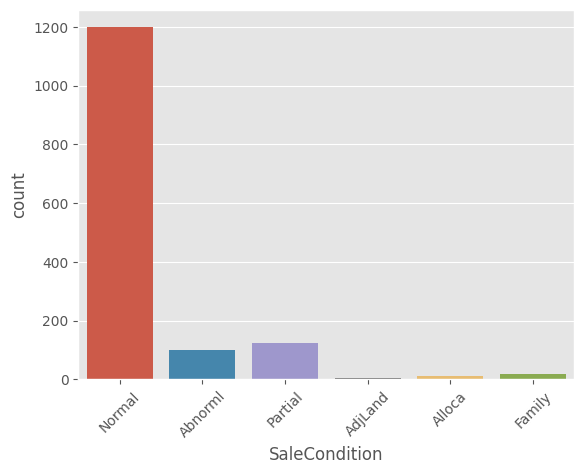

In [43]:
sns.countplot(x=df['SaleCondition'])
plt.xticks(rotation=45)

''

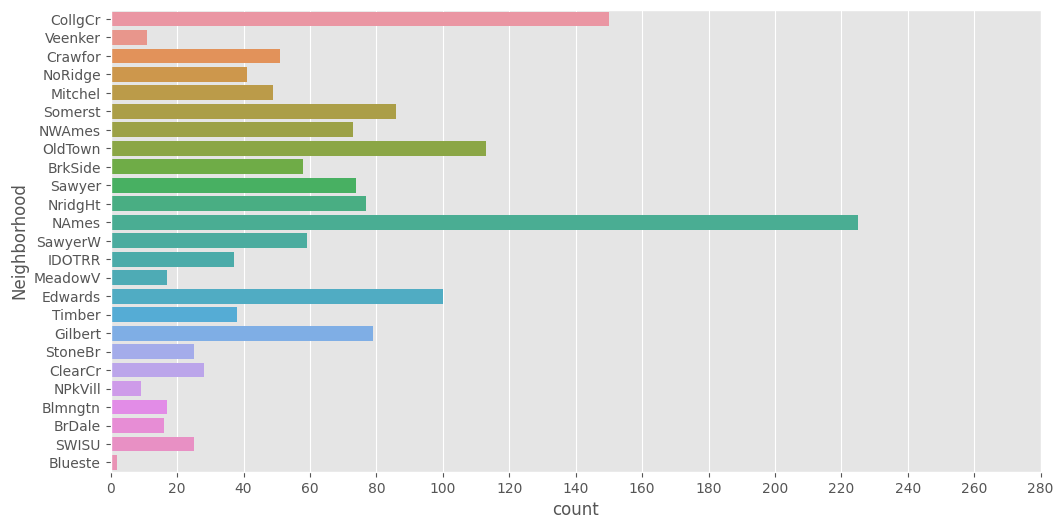

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(y=df['Neighborhood'])
plt.xticks(list(range(0,300,20)))
#get rid of extra text
; 

''

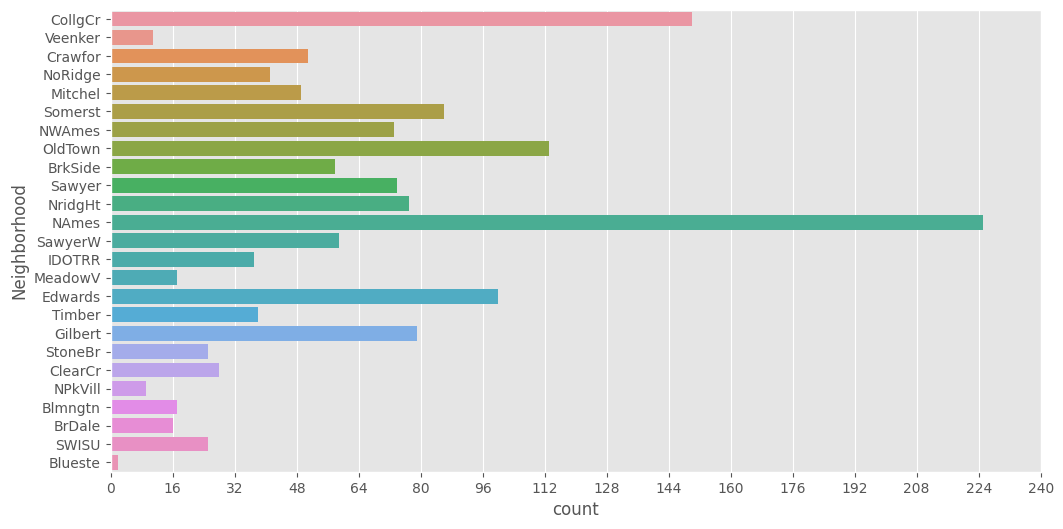

In [45]:
end_point = df['Neighborhood'].value_counts().max() + 25
steps = int(end_point/15)

plt.figure(figsize=(12,6))
sns.countplot(y=df['Neighborhood']) # add hue=df['Neighborhood'] if your bars are not colored
plt.xticks(list(range(0,end_point,steps)))
#get rid of extra text
; 

''

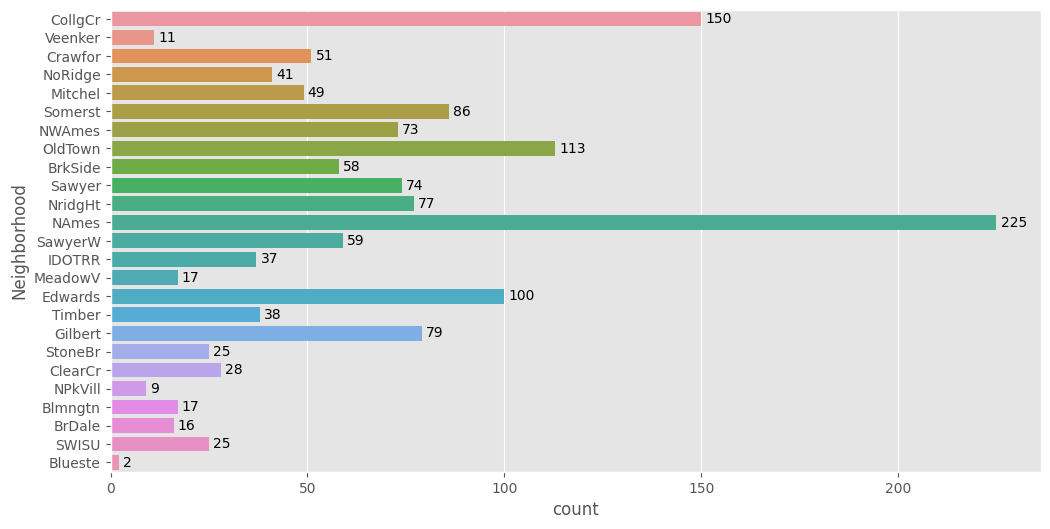

In [46]:
end_point = df['Neighborhood'].value_counts().max() + 25
steps = int(end_point/15)

plt.figure(figsize=(12,6))
ax = sns.countplot(y=df['Neighborhood']) # add hue=df['Neighborhood'] if your bars are not colored


for a in ax.containers:
    ax.bar_label(a,padding=3)

#ax.bar_label(ax.containers[0]) works too
;

### Multivariate Analysis

- Multi: analyzing multiple factors/columns/features
- Find the relationship between 2 or more variables
- Types:
    - Numeric vs Numeric
    - Categorical vs Numeric
    - Categorical vs Categorical

#### Numeric vs Numeric

##### Scatterplots

Text(0, 0.5, 'Above grade (ground) living area sqft (GrLivArea)')

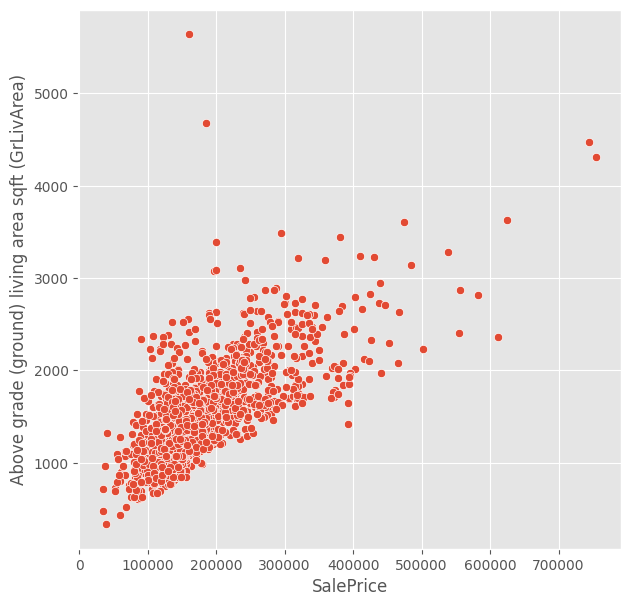

In [47]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=df['SalePrice'], y=df['GrLivArea'])
plt.ylabel('Above grade (ground) living area sqft (GrLivArea)')

**Observations**
- Sale price generally increases as square footage increases (positive correlation between the 2 columns)
- The higher the Sale Price is, the lower the correlation gets with GrLivArea
- We can see the same outliers observed earlier from our univariate analysis

Include Multiple Factors/Features In Scatterplots

Text(0, 0.5, 'Above grade (ground) living area sqft (GrLivArea)')

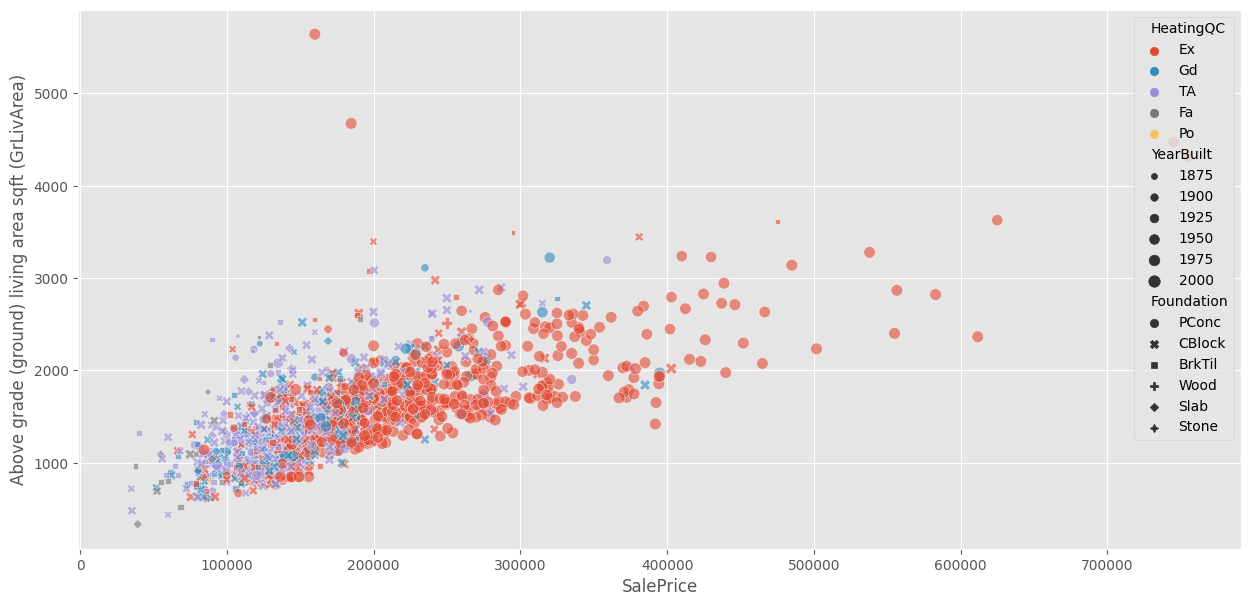

In [48]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=df['SalePrice'], y=df['GrLivArea']
                , size=df['YearBuilt']
                , alpha=.6 # add transparency to see overlapping markers
                , hue=df['HeatingQC']
                , style=df['Foundation']
                )
plt.ylabel('Above grade (ground) living area sqft (GrLivArea)')

##### lmplots

They're useful for statistical analysis, such as Linear Regression (Linear Model Plot =lmplot)

''

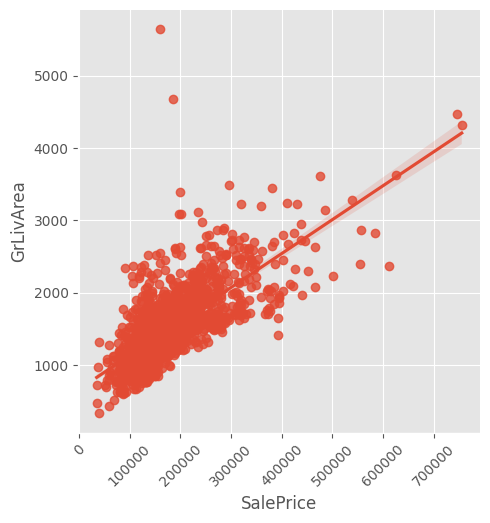

In [49]:
sns.lmplot(data=df, x='SalePrice', y='GrLivArea', fit_reg=True)
plt.xticks(rotation=45)
;

##### jointplots

They're very comprehensive and show multiple elements:
- Scatterplot
- Regression fitted line
- Histogram and KDE for each axis

''

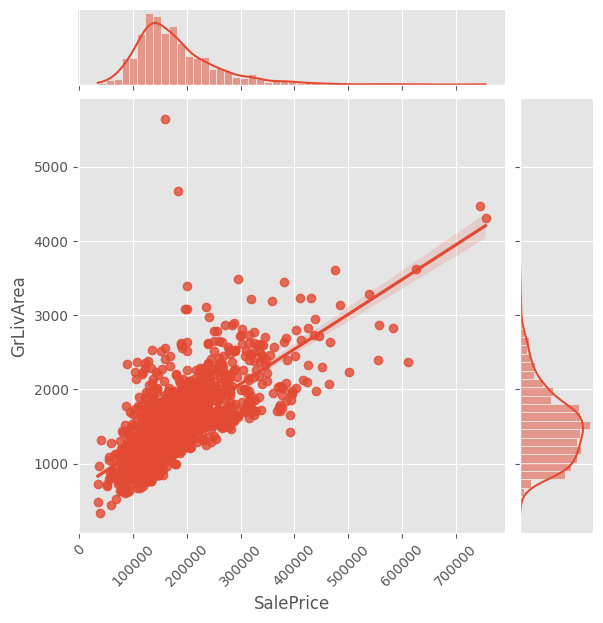

In [50]:
sns.jointplot(data=df, x='SalePrice', y='GrLivArea', kind='reg')
plt.xticks(rotation=45)
;

''

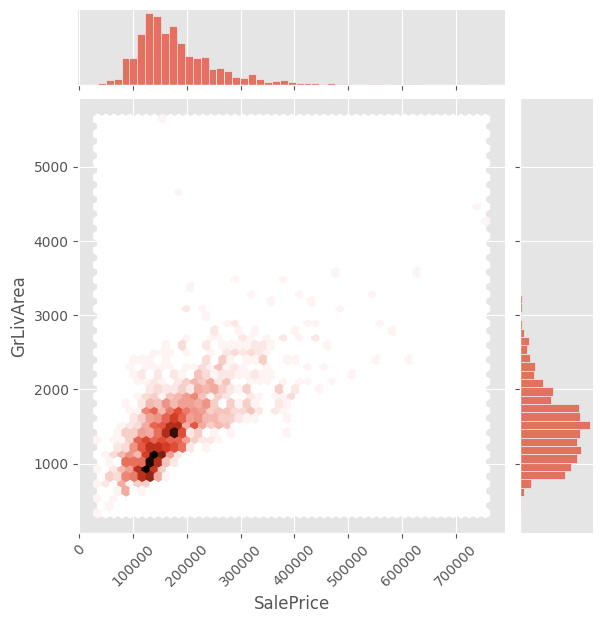

In [51]:
sns.jointplot(data=df, x='SalePrice', y='GrLivArea', kind='hex')
plt.xticks(rotation=45)
;

#### Categorical vs Categorical
**Correlation Analysis and Heatmap**

In [52]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
LotFrontage,1.000000,0.100739,0.176561,-0.053457,0.036853,0.078686,0.105010,0.076670,-0.009312,0.160829,...,0.201473,-0.016780,0.069605,0.027366,0.023499,0.022969,0.114106,-0.059606,-0.012094,0.209624
LotArea,0.100739,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,-0.014261,0.263843
OverallQual,0.176561,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,-0.027347,0.790982
OverallCond,-0.053457,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,0.043950,-0.077856
YearBuilt,0.036853,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,-0.013618,0.522897
YearRemodAdd,0.078686,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.035743,0.507101
MasVnrArea,0.105010,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,...,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.008317,0.472614
BsmtFinSF1,0.076670,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.014359,0.386420
BsmtFinSF2,-0.009312,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,0.031706,-0.011378
BsmtUnfSF,0.160829,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,...,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,-0.041258,0.214479


<Axes: >

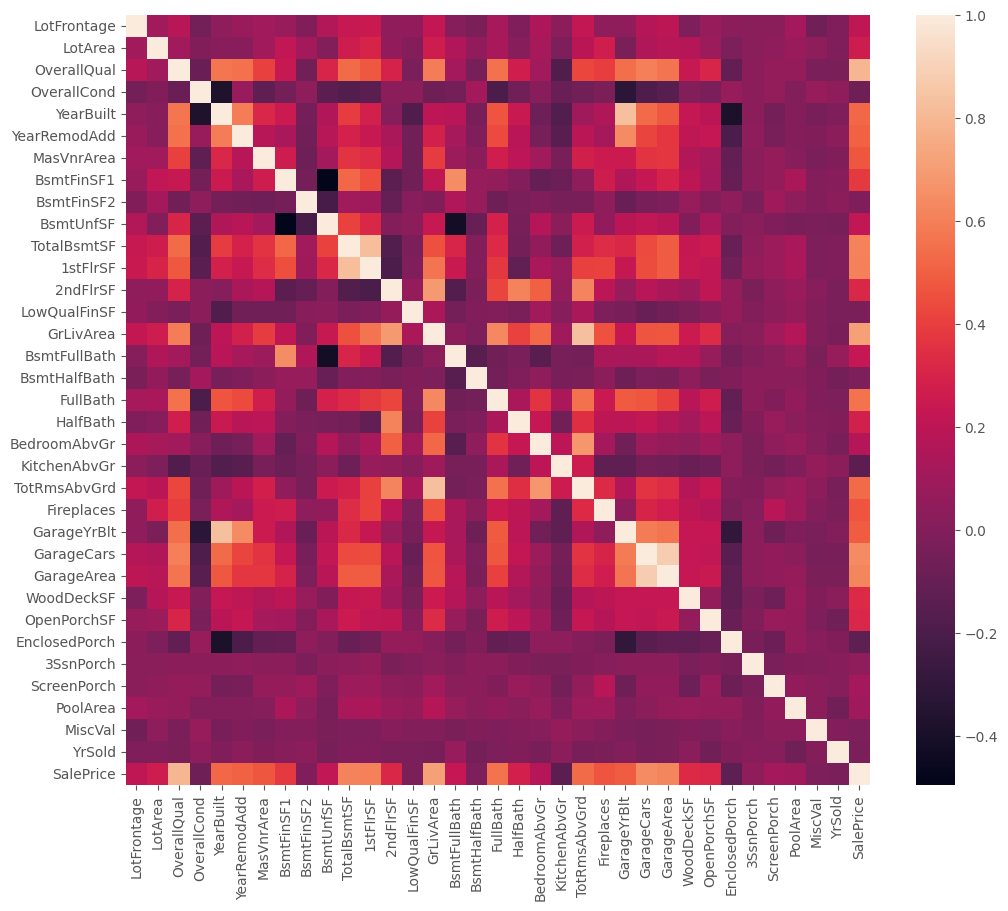

In [53]:
plt.figure(figsize=(12,10))

sns.heatmap(corr_matrix)

**Observation**
- We can see that we have a mix of non-correlated columns, positively, negatively correlated columns
- The goal is to focus on the columns that are highly correlated (negative or positive) with our predicted value (SalePrice)
- There's a lot of noise. We can summarize the heatmap further by focusing on the columns that are highly correlated with SalePrice

In [54]:
# define a value to pick columns that are higher than 5% correlation (neg and pos) with SalePrice
threshold = .55

#build a corr matrix for SalePrice only
corr_SalePrice = corr_matrix['SalePrice']

#grab the columns that are highly correlated with Sale Price using abs value for both neg and pos
high_corr_cols = corr_SalePrice[abs(corr_SalePrice) > threshold].index

high_corr_cols

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

<Axes: >

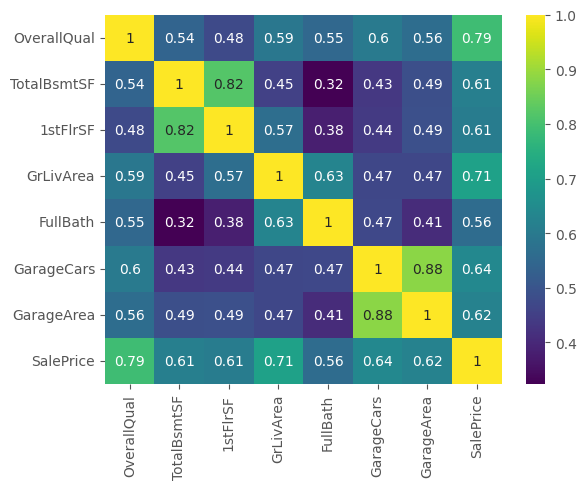

In [55]:
high_corr_matrix = df[high_corr_cols].corr()

sns.heatmap(high_corr_matrix, annot=True, cmap='viridis')

##### pairplot

- Another comprehensive visual in seaborn is `pairplot` which shows the following:
    - Correlation Matrix
    - Scatterplot between 2 columns
    - Histograms when the column matches itself
- Let's use the highly correlated column in our `pairplot` analysis

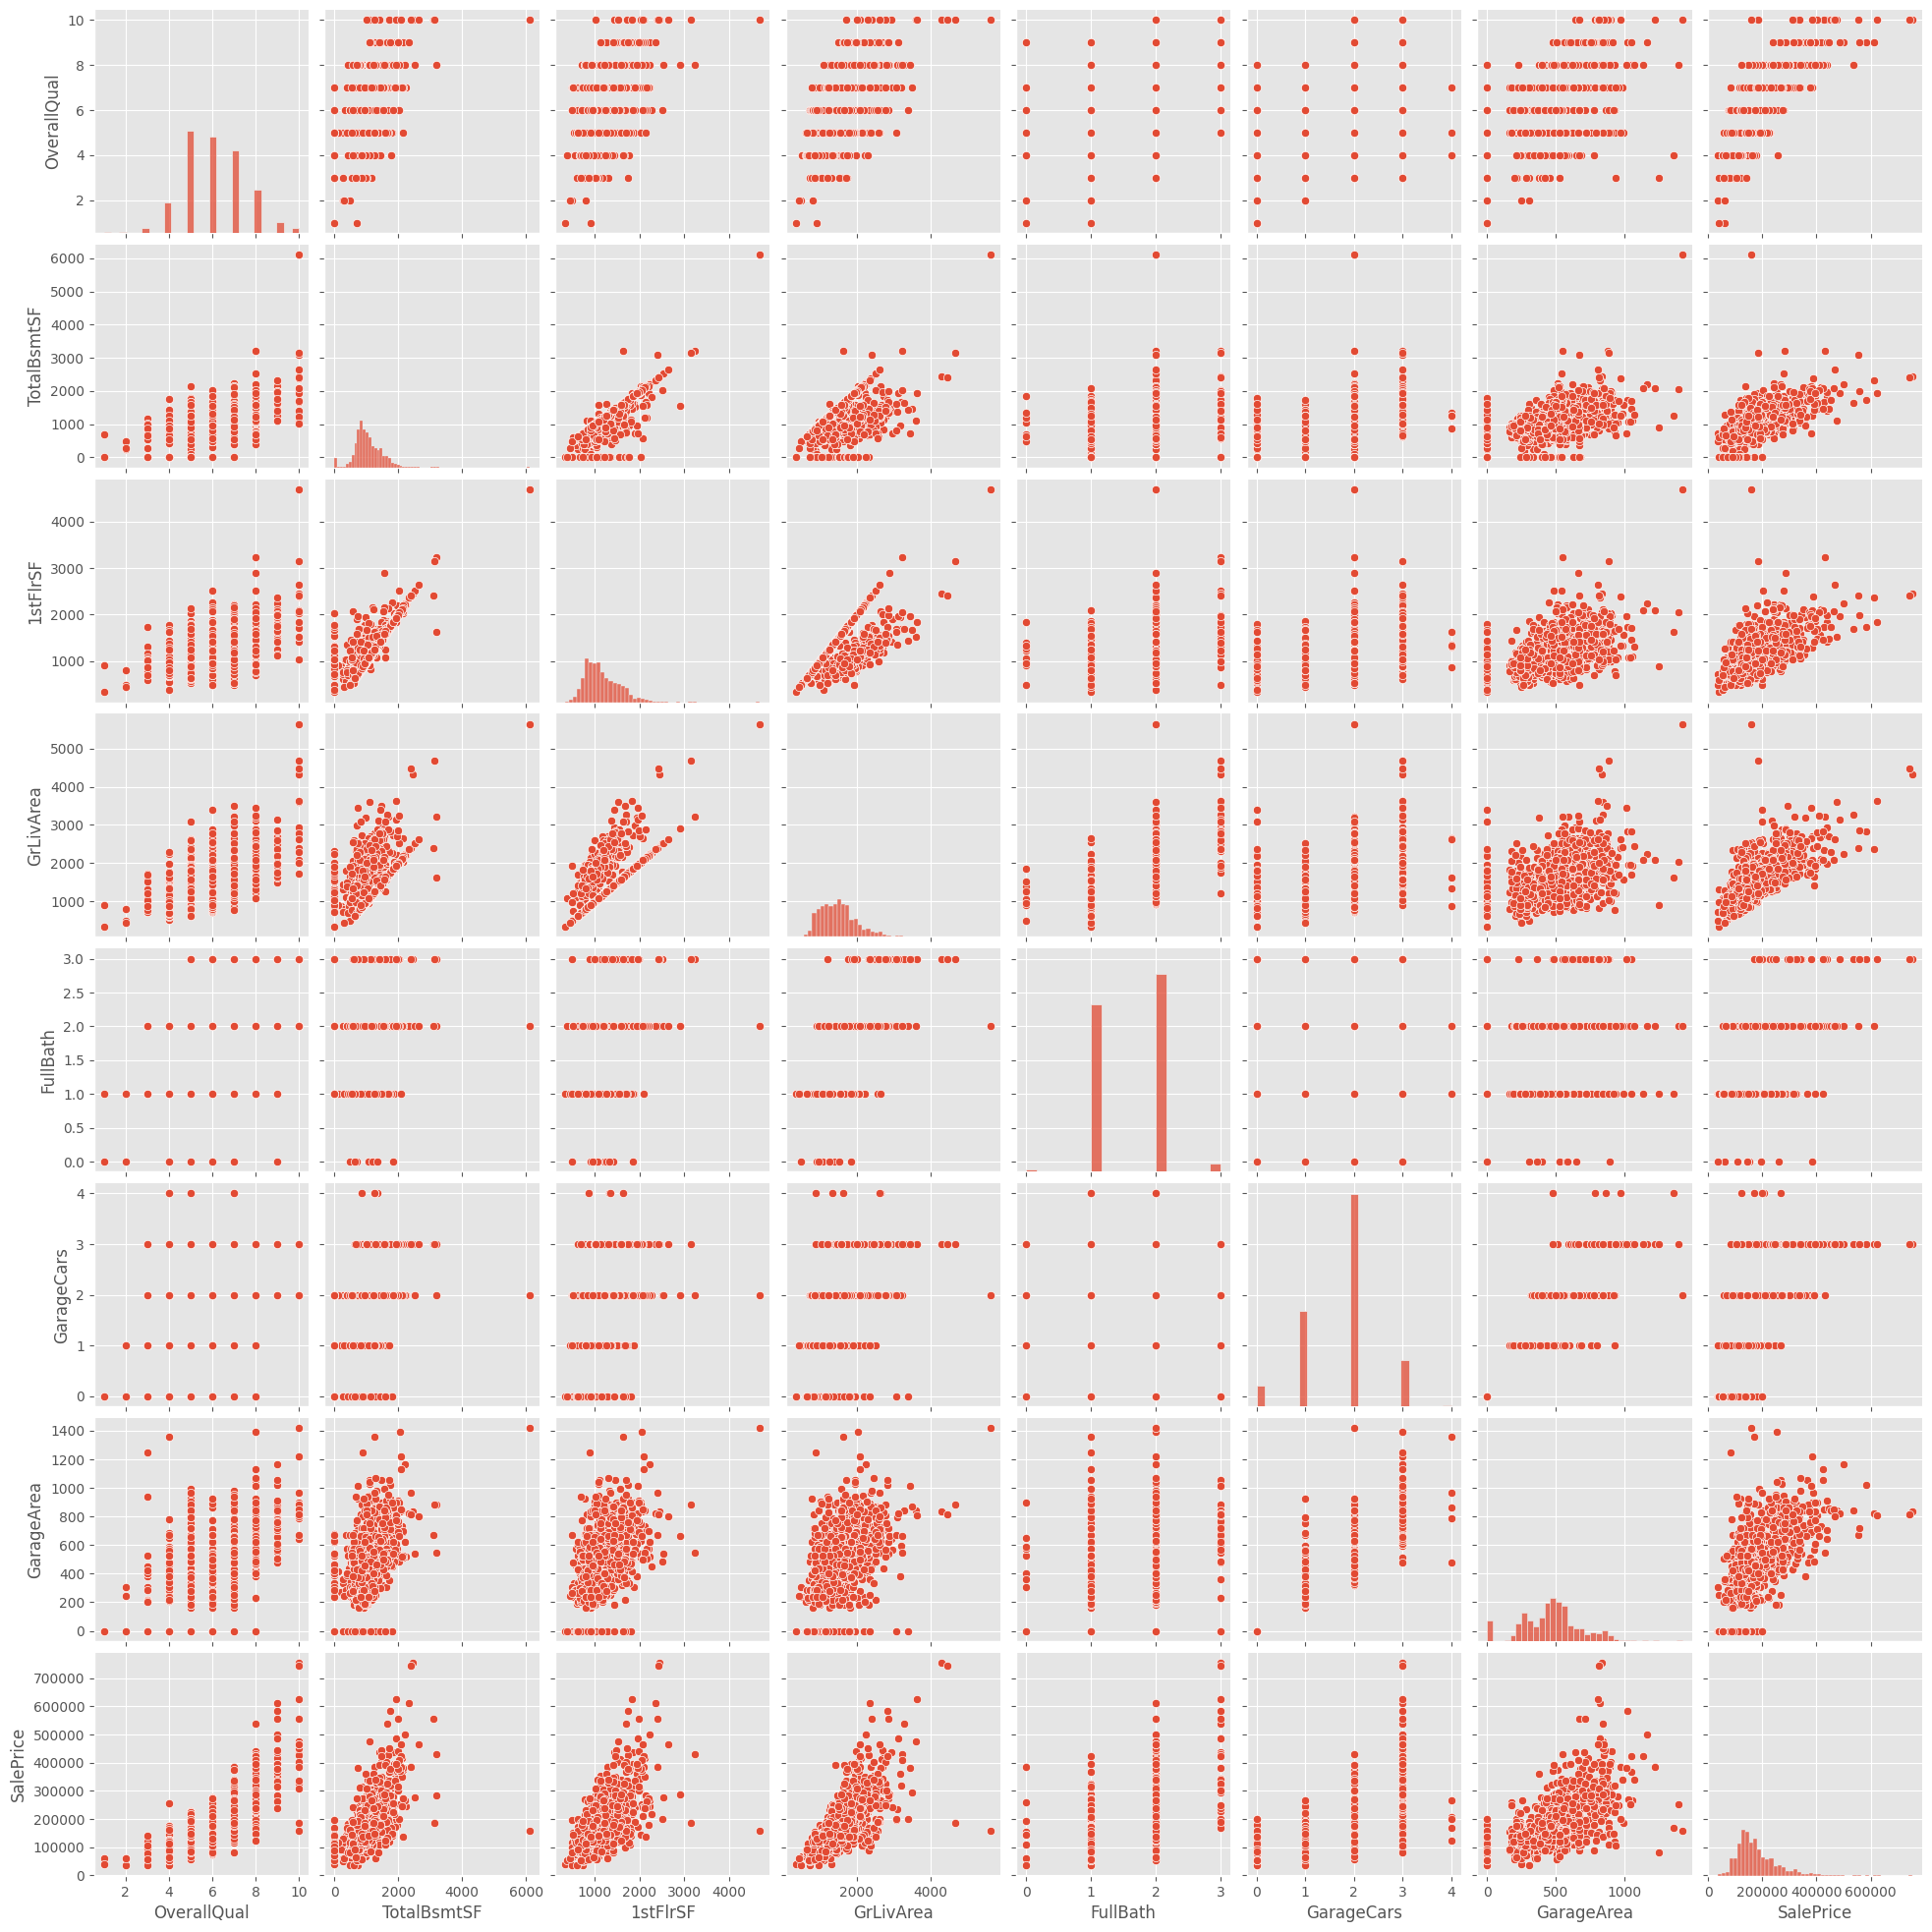

In [56]:
sns.pairplot(df[high_corr_cols])

**Add a categorical col to pairplot**

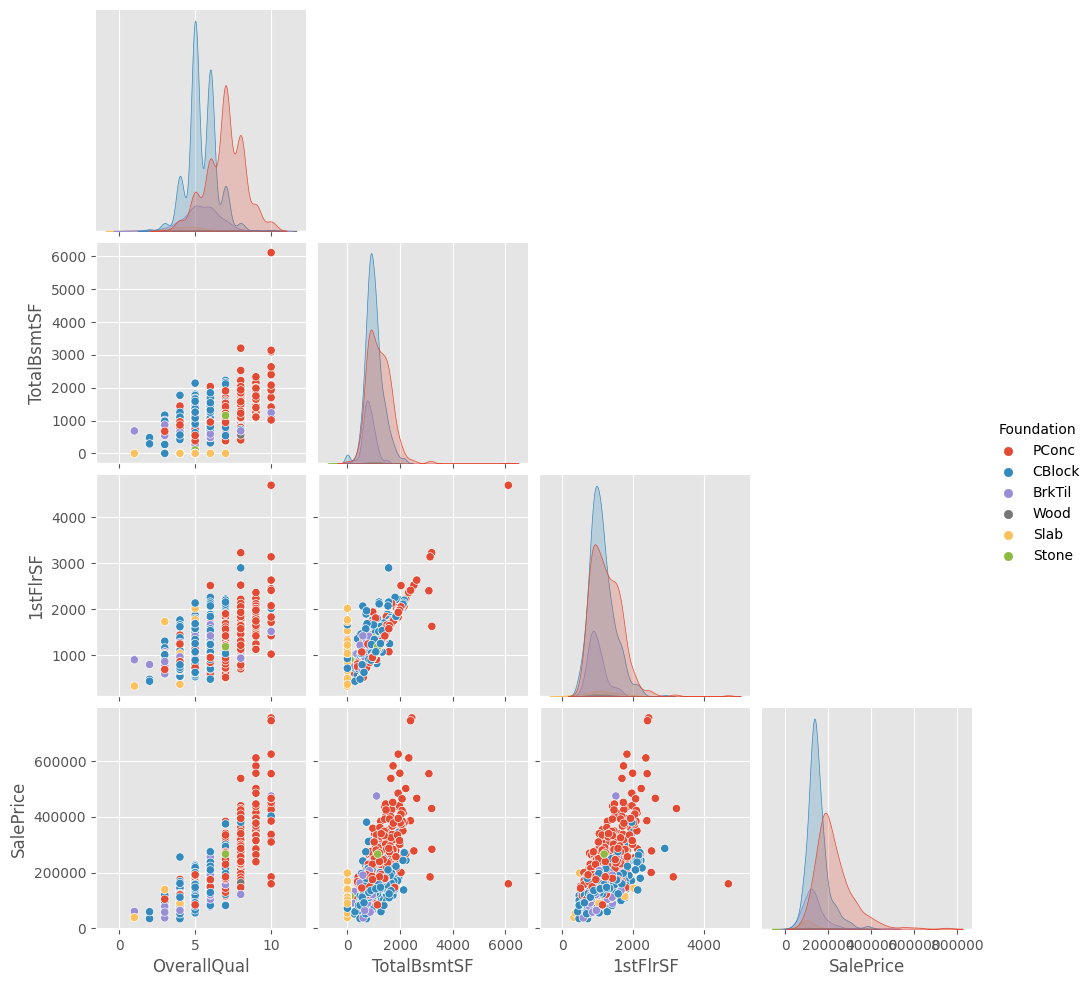

In [57]:
high_corr_cols_2 = ['OverallQual', 'TotalBsmtSF', '1stFlrSF','SalePrice', 'Foundation']

sns.pairplot(df[high_corr_cols_2], hue='Foundation', corner=True)

#### Numeric vs Categorical

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

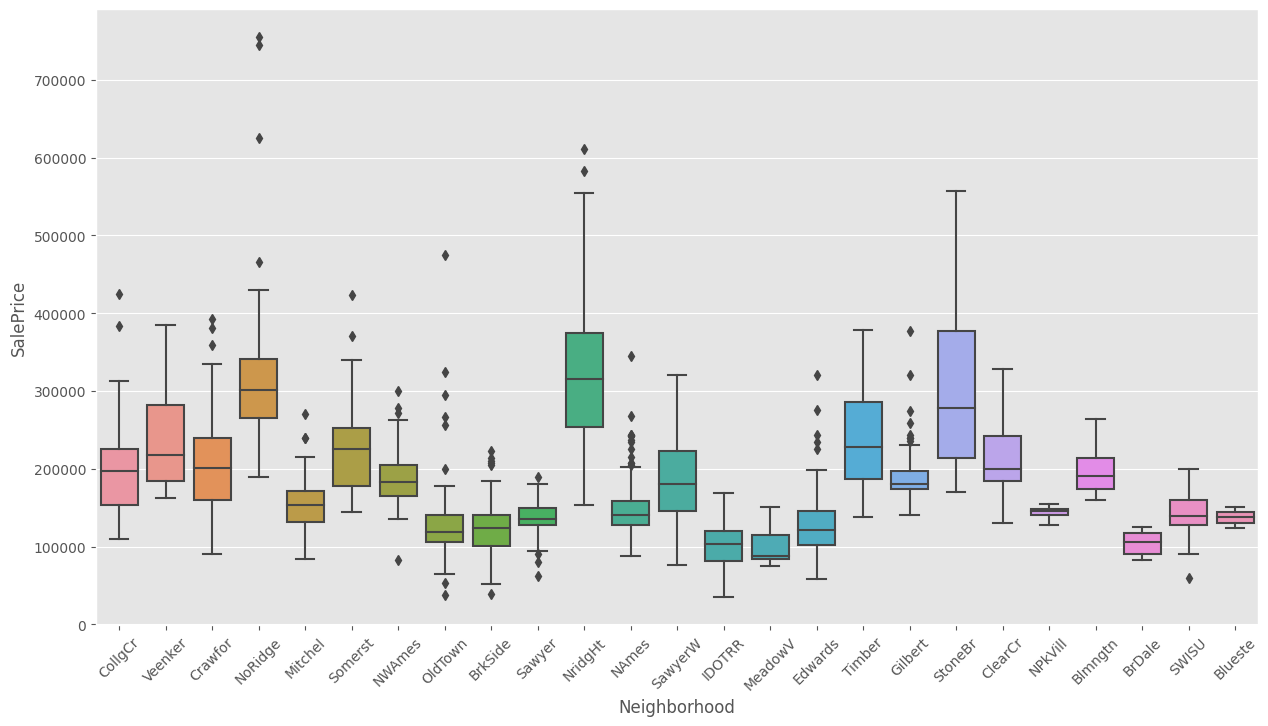

In [58]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data=df, x='Neighborhood', y='SalePrice')

- We can conclude that the distribution of sale price changes with individual neighborhoods

#### Swarmplots

In [59]:
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

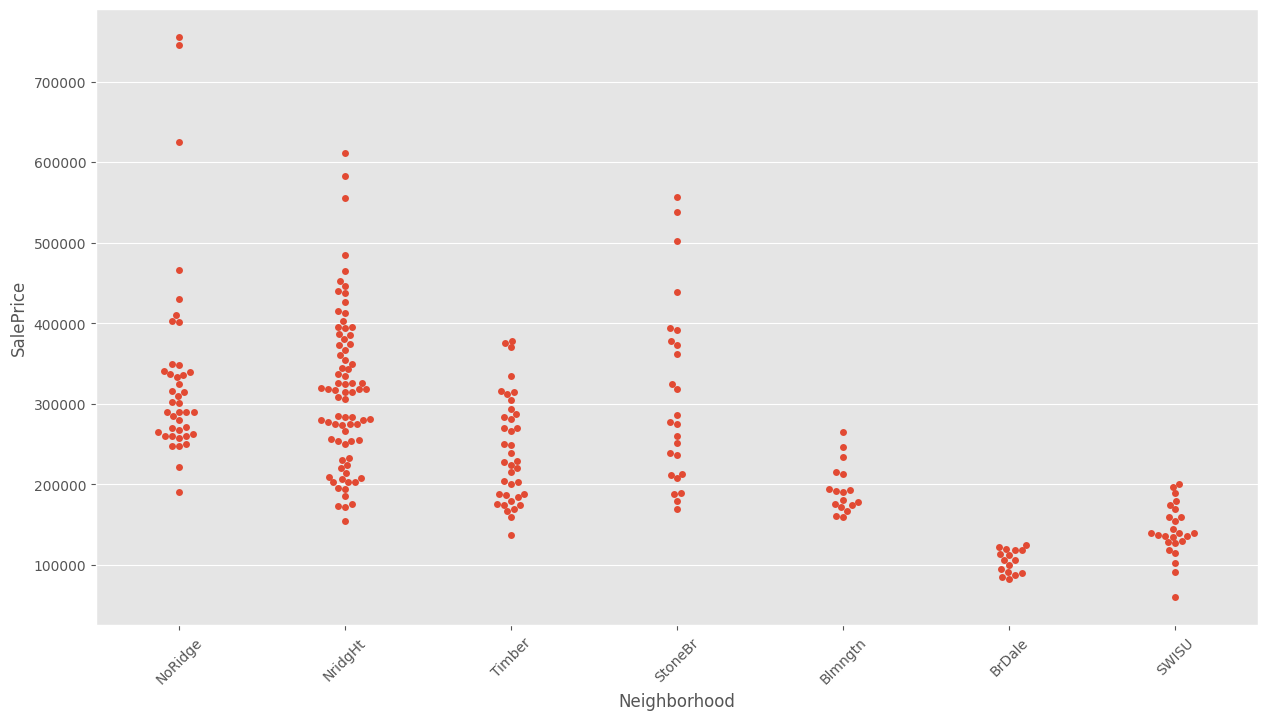

In [60]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
#focus on smaller group of categories
df_spec_neighb = df[df['Neighborhood'].isin(['NoRidge', 'NridgHt', 'StoneBr','Timber' ,'Blmngtn', 'BrDale', 'SWISU'])]
sns.swarmplot(data=df_spec_neighb, x='Neighborhood', y='SalePrice')

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


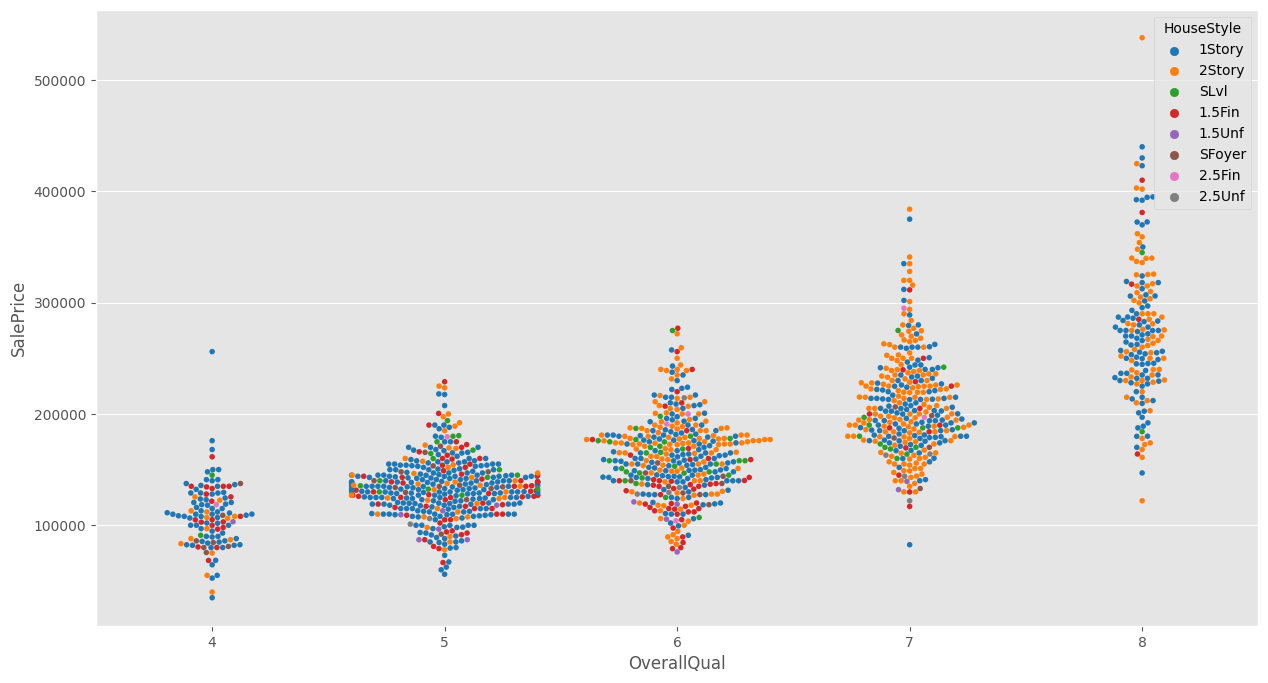

In [61]:
plt.figure(figsize=(15,8))
#focus on smaller group of categories
df_spec_qual = df[df['OverallQual'].isin([4,5,6,7,8 ])]
sns.swarmplot(data=df_spec_qual, x='OverallQual', y='SalePrice', size=4
              , hue='HouseStyle' #breakdown the points by color (second category)
              , palette='tab10' #Tableau's color palette
              )

**Observations**
- The widest width of the swarms represents the highest frequency of data points
- Quality = 5 has normal distribution (symmetrical)
- quality = 7 seems to be skewed
- Quality = 8 has the negative highest kurtosis
- we can see that 1-story houses are the majority for quality of 4 and 5
- However, a quality of 6 and up starts to have more 2Story houses

Another method of doing distribution comparison is to blend in histograms of each qual level

<Axes: xlabel='SalePrice', ylabel='Count'>

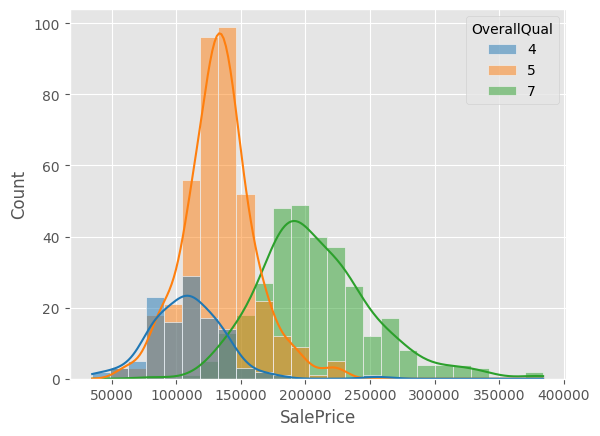

In [62]:
df_spec_qual = df[df['OverallQual'].isin([4,5,7 ])]
sns.histplot(data=df_spec_qual, x='SalePrice', hue='OverallQual',palette='tab10', kde=True)

#### Violin Plots

![VP](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.5_Exploratory_Data_Analysis/Trainer_PPT_and_IPYNB/VP.png)


<Axes: xlabel='OverallQual', ylabel='SalePrice'>

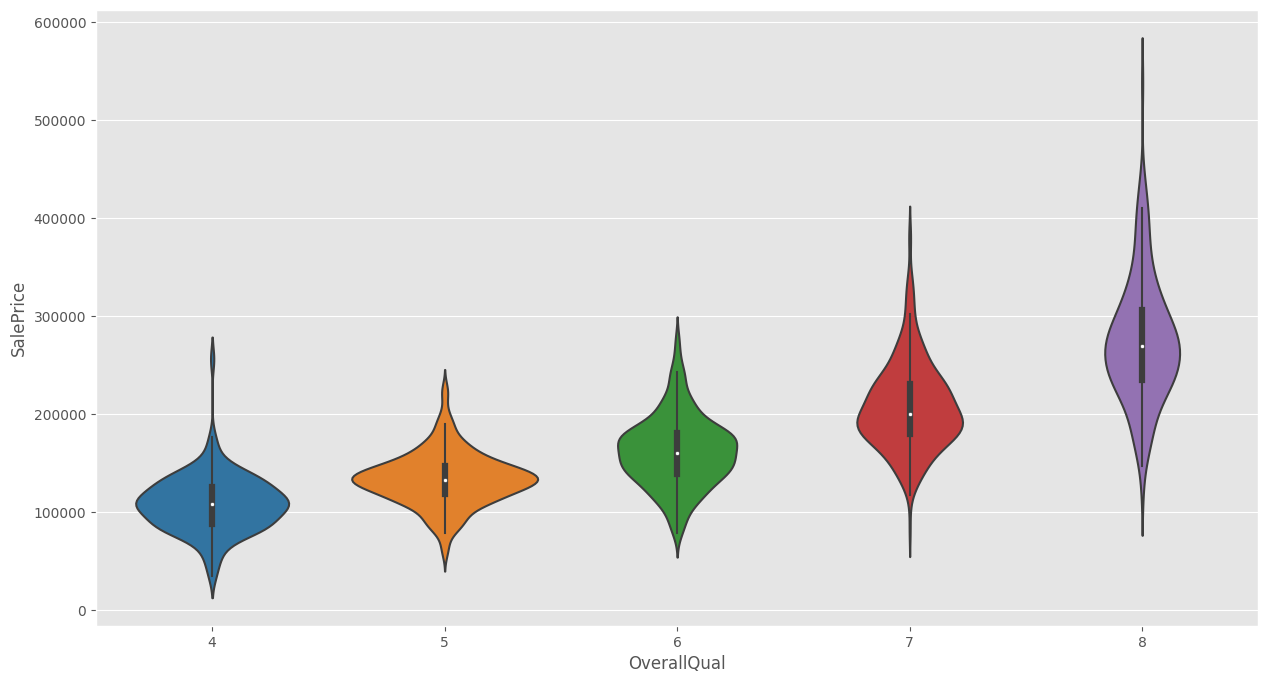

In [63]:
plt.figure(figsize=(15,8))
#focus on smaller group of categories
df_spec_qual = df[df['OverallQual'].isin([4,5,6,7,8 ])]
sns.violinplot(data=df_spec_qual, x='OverallQual', y='SalePrice', size=4
             
              , palette='tab10' #Tableau's color palette
              )

<Axes: xlabel='SalePrice', ylabel='ExterCond'>

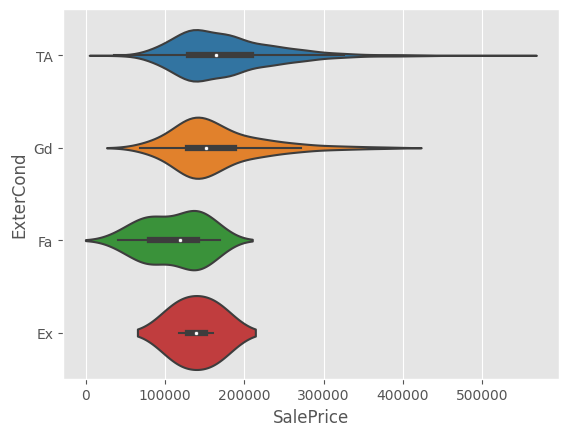

In [64]:
sns.violinplot(data=df_spec_qual, y='ExterCond', x='SalePrice', palette='tab10')

#### Stacked Bar Chart

In [65]:
CT_Qual = pd.crosstab(index=df['Neighborhood'], columns=df['OverallQual'])
CT_Qual

OverallQual,1,2,3,4,5,6,7,8,9,10
Neighborhood,,,,,,,,,,
Blmngtn,0,0,0,0,0,0,14,3,0,0
Blueste,0,0,0,0,0,2,0,0,0,0
BrDale,0,0,0,0,5,11,0,0,0,0
BrkSide,1,1,3,10,21,18,4,0,0,0
ClearCr,0,0,0,3,6,10,9,0,0,0
CollgCr,0,0,0,1,28,24,71,23,3,0
Crawfor,0,0,0,1,11,19,13,7,0,0
Edwards,1,0,5,25,38,23,5,0,1,2
Gilbert,0,0,0,1,3,33,36,5,1,0


<Axes: xlabel='Neighborhood'>

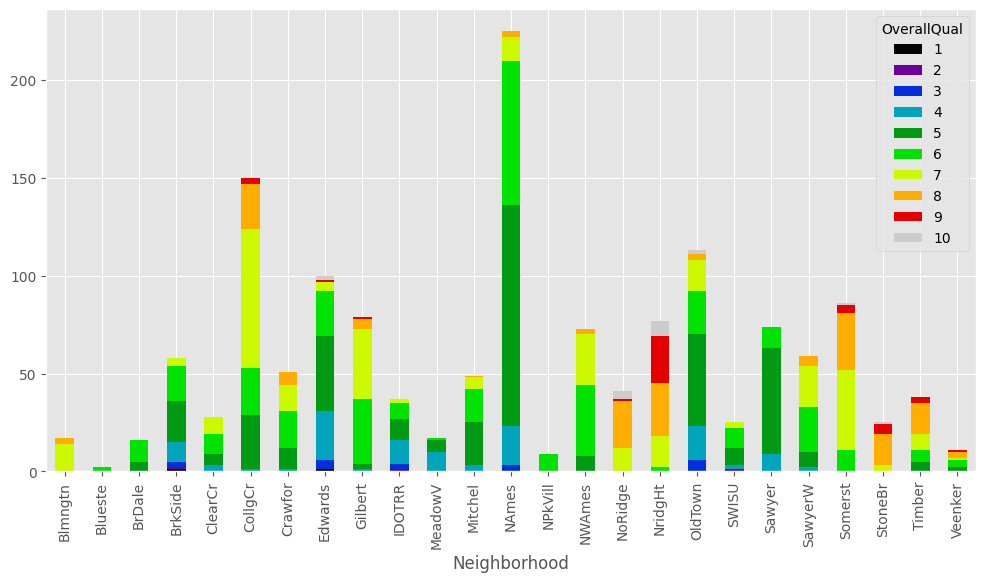

In [70]:
CT_Qual.plot(kind='bar', figsize=(12,6), stacked=True, colormap='nipy_spectral')

Observations
- contribution of each overall qualscore count for each neighborhood along with the total. in other words, You can see distribution of those various quality scores across neighborhoods.
- NAmes has the most houses, and the most 5 & 6 quality
- Not many neighborhoods have highest quality houses  (8 to 9). we have mainly NridgeHt, Somerst, and StoneBr.
- CollgCr has a good distribution for the high quality scores from 5 to 9 scores

> The problem with the plot above is that it is fixed and it's hard sometimes to get a measurement of the stacked bars. It is recommended to use an interactive graphing library like plotly


#### Intro to Plotly
The main website has a lot of good examples https://plotly.com/python/


`pip install plotly`

if you get an error or the plot doesn't show, you need to `pip install nbformat`

Plotly has 2 main graphing libraries with different features

In [81]:
import plotly

plotly.__version__

'5.14.1'

In [71]:
import plotly.express as px
import plotly.graph_objects as go

In [74]:
fig = px.bar(data_frame=CT_Qual,
             color='OverallQual',
             title='Quality Score Distribution Across Different Neighborhoods')

fig.show()

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

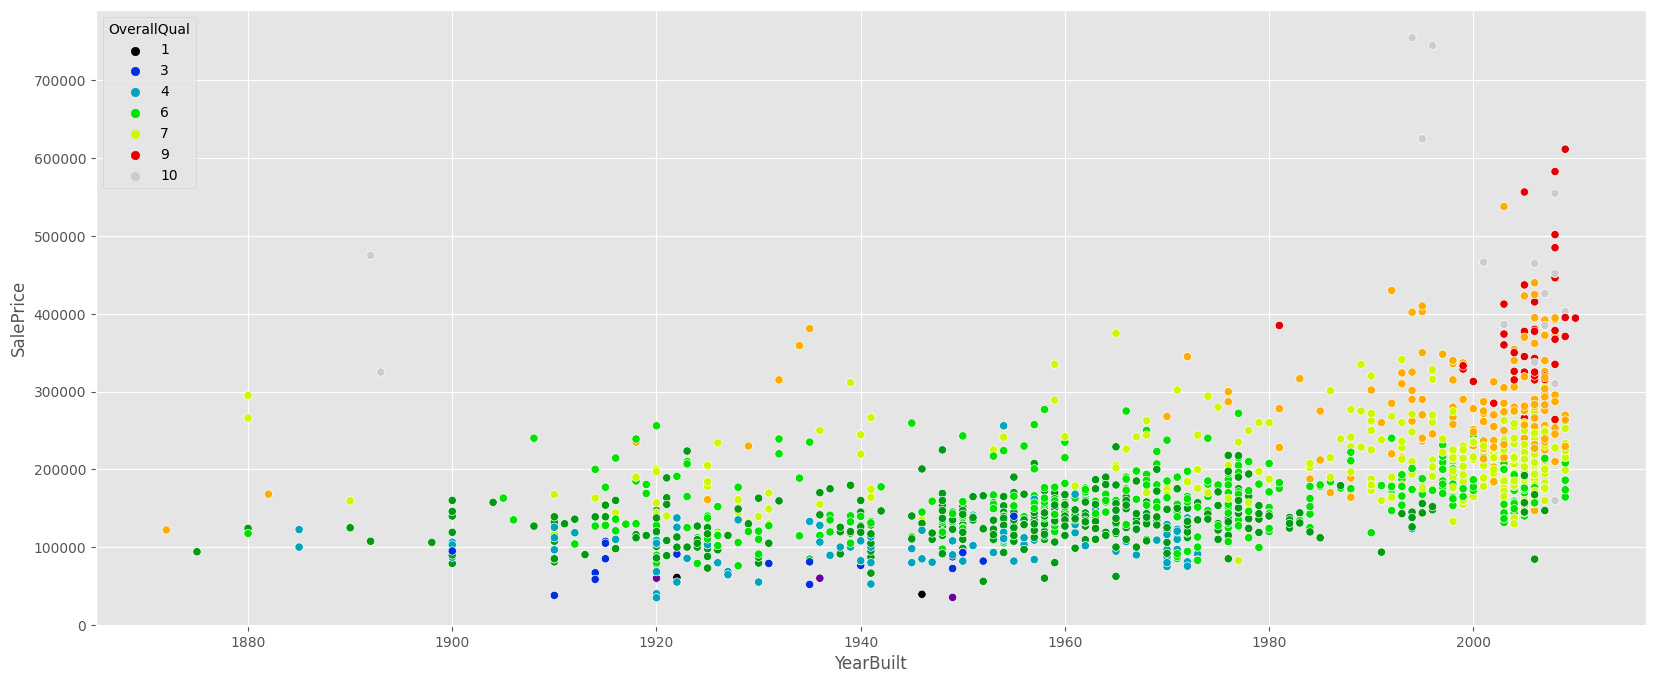

In [78]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=df['YearBuilt'], y=df['SalePrice'], hue=df['OverallQual'], palette='nipy_spectral')

In [79]:
fig = px.scatter(data_frame=df,
                 x='YearBuilt',
                 y='SalePrice',
                 color='OverallQual')

fig.show()

### Pie Chart and Sunburst

In [87]:
top_6_larg_neighb = df['Neighborhood'].value_counts().head(6).index
top_6_larg_neighb

Index(['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 'Gilbert'], dtype='object', name='Neighborhood')

In [88]:
df_largest_neighb = df[df['Neighborhood'].isin(top_6_larg_neighb)]

In [90]:
fig = px.pie(data_frame=df_largest_neighb, values='SalePrice', names='Neighborhood', title='Top 6 Largest Neighborhoods')
fig.show()

In [93]:
fig = px.sunburst(data_frame=df_largest_neighb, 
                  path=['Neighborhood', 'BldgType', 'OverallQual'],
                  values='SalePrice',
                  width=900,
                  height=900)

fig.show()